In [88]:
import os
import requests
import pandas as pd
import matplotlib.pyplot as plt
import sys
import numpy as np
from nltk import word_tokenize
from nltk.corpus import stopwords
from string import punctuation

from bs4 import BeautifulSoup

# Data exploration
## exploration of [UvA Alma Beelbank](https://uba.uva.nl/en/support/open-data/data-sets-and-publication-channels/data-sets-and-publication-channels.html#Archeological-objects)
details: ~40.000 records

In [89]:
alma_beeldbank = pd.read_xml('../data/CUE/uva_alma_beeldbank_dc_new.xml')
alma_beeldbank

# alma_beeldbank_marc = parse_xml_to_array('data/uva_alma_beeldbank_marc_new.xml')

,schemaLocation,title,description,publisher,contributor,date,type,identifier,language,relation,subject,coverage,format,source
0,http://www.openarchives.org/OAI/2.0/oai_dc/ ht...,"Architecture, peinture et sculpture de la mais...",Beschrijving gedrukte uitgave,A Amsterdam chez Gerard Valk,"Quellinus, Artus (Artus), beeldhouwer, 1609-16...",1719,None,https://hdl.handle.net/11245/3.3680,fre,"Architecture, peinture et sculpture de la mais...",None,None,None,None
1,http://www.openarchives.org/OAI/2.0/oai_dc/ ht...,"Max Havelaar, of de Koffij-veilingen der neder...",Beschrijving gedrukte uitgave,Brussel,"Lennep, J. van (Jacob), 1802-1868, publisher (...",1859,None,https://hdl.handle.net/11245/3.3641,dut,"Max Havelaar, of de Koffij-veilingen der neder...",None,None,None,None
2,http://www.openarchives.org/OAI/2.0/oai_dc/ ht...,Rayz Beschraybung 1719-1724,Beschrijving gedrukte uitgave,Amsterdam,Zevi Hirsh ben Abraham transcriber,1752,None,https://hdl.handle.net/11245/3.3708,yid,Rayz Beschraybung 1719-1724,None,None,None,None
3,http://www.openarchives.org/OAI/2.0/oai_dc/ ht...,Meleket ha-diqduq,Beschrijving gedrukte uitgave,Amsterdam,"ʾAbohav, Yiẕḥaq, 1605-1693 author (NL-LeOCL)...",1631,None,https://hdl.handle.net/11245/3.3709,heb,Meleket ha-diqduq,None,None,None,None
4,http://www.openarchives.org/OAI/2.0/oai_dc/ ht...,Neederlandsche historien,Beschrijving gedrukte uitgave,Amsterdam Muiden,"Hooft, P.C. (Pieter Corneliszoon), 1581-1647 a...",1628,None,https://pid.uba.uva.nl/ark:/88238/b19900378229...,dut,Nederlandsche historien sedert de overdraght d...,Tachtigjarige oorlog,Nederland.http://data.bibliotheken.nl/id/thes/...,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35559,http://www.openarchives.org/OAI/2.0/oai_dc/ ht...,"Lipsius, Justus, 1547-1606 schilderij: portret",Beschrijving gedrukte uitgave,None,None,1743,None,https://hdl.handle.net/11245/3.94,xxx,"Lipsius, Justus, 1547-1606",None,None,geschilderd,None
35560,http://www.openarchives.org/OAI/2.0/oai_dc/ ht...,"Alexander VII, Paus, regerend 1655-1667 schild...",Beschrijving gedrukte uitgave,None,None,1743,None,https://hdl.handle.net/11245/3.2533,xxx,"Alexander VII, Paus, regerend 1655-1667",None,None,geschilderd,None
35561,http://www.openarchives.org/OAI/2.0/oai_dc/ ht...,"Commelin, J. (Johannes) (1629-1692) schilderij...",Beschrijving gedrukte uitgave,None,None,1889,None,https://hdl.handle.net/11245/3.708,xxx,"Commelin, J. (Johannes) (1629-1692)",None,None,geschilderd,None
35562,http://www.openarchives.org/OAI/2.0/oai_dc/ ht...,"Walraven, D.A. (Didericus Adrianus) (1732-1804...",Beschrijving gedrukte uitgave,None,None,1770,None,https://hdl.handle.net/11245/3.2525,xxx,"Walraven, D.A. (Didericus Adrianus) (1732-1804)",None,None,geschilderd,None


In [90]:
# print dataset rule
# alma_beeldbank.loc[alma_beeldbank['identifier'] == 'https://hdl.handle.net/11245/3.826']
alma_beeldbank['schemaLocation'].iloc[0]

'http://www.openarchives.org/OAI/2.0/oai_dc/ http://www.openarchives.org/OAI/2.0/oai_dc.xsd'

In [91]:
# print random identifier
alma_beeldbank['identifier'].iloc[0]

'https://hdl.handle.net/11245/3.3680'

In [92]:
# process for latex code
alma_beeldbank.iloc[0].to_markdown()

"|                | 0                                                                                                                                                                       |\n|:---------------|:------------------------------------------------------------------------------------------------------------------------------------------------------------------------|\n| schemaLocation | http://www.openarchives.org/OAI/2.0/oai_dc/ http://www.openarchives.org/OAI/2.0/oai_dc.xsd                                                                              |\n| title          | Architecture, peinture et sculpture de la maison de ville d'Amsterdam, représentée en 109 figures en taille-douce                                                       |\n| description    | Beschrijving gedrukte uitgave                                                                                                                                           |\n| publisher      | A Amsterdam chez Gerard Valk  

In [93]:
# produce description of dataset
print(alma_beeldbank.describe().style.to_latex())

\begin{tabular}{lllllllllllllll}
 & schemaLocation & title & description & publisher & contributor & date & type & identifier & language & relation & subject & coverage & format & source \\
count & 35564 & 35564 & 35512 & 29517 & 28220 & 35093 & 897 & 35564 & 35564 & 35496 & 10883 & 2050 & 5390 & 1 \\
unique & 1 & 29216 & 16 & 5941 & 8817 & 899 & 3 & 35554 & 55 & 29299 & 2832 & 630 & 245 & 1 \\
top & http://www.openarchives.org/OAI/2.0/oai_dc/ http://www.openarchives.org/OAI/2.0/oai_dc.xsd & lamp aardewerk: lamp & Beschrijving gedrukte uitgave & Jerusalem & Pekidim & Amarkalim (Amsterdam) rcp & 1889 & http://vocab.getty.edu/aat/300028094 & http://hdl.handle.net/11245/test.3.41731 & dut & lamp & Boekenveilingen & Nederland.http://data.bibliotheken.nl/id/thes/p078600987 & vorm & de Nieuwe Bijdragen voor het Onderwijs en de Opvoeding \\
freq & 35564 & 256 & 31678 & 5890 & 10044 & 1548 & 655 & 8 & 13451 & 264 & 3264 & 236 & 932 & 1 \\
\end{tabular}



### Dataset info. 

In [94]:
alma_beeldbank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35564 entries, 0 to 35563
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   schemaLocation  35564 non-null  object
 1   title           35564 non-null  object
 2   description     35512 non-null  object
 3   publisher       29517 non-null  object
 4   contributor     28220 non-null  object
 5   date            35093 non-null  object
 6   type            897 non-null    object
 7   identifier      35564 non-null  object
 8   language        35564 non-null  object
 9   relation        35496 non-null  object
 10  subject         10883 non-null  object
 11  coverage        2050 non-null   object
 12  format          5390 non-null   object
 13  source          1 non-null      object
dtypes: object(14)
memory usage: 3.8+ MB


### dataset per subject

In [95]:
subjects = alma_beeldbank[alma_beeldbank['subject'].notnull()]
subjects

,schemaLocation,title,description,publisher,contributor,date,type,identifier,language,relation,subject,coverage,format,source
4,http://www.openarchives.org/OAI/2.0/oai_dc/ ht...,Neederlandsche historien,Beschrijving gedrukte uitgave,Amsterdam Muiden,"Hooft, P.C. (Pieter Corneliszoon), 1581-1647 a...",1628,None,https://pid.uba.uva.nl/ark:/88238/b19900378229...,dut,Nederlandsche historien sedert de overdraght d...,Tachtigjarige oorlog,Nederland.http://data.bibliotheken.nl/id/thes/...,None,None
58,http://www.openarchives.org/OAI/2.0/oai_dc/ ht...,Sisouan : hamagrouthiun Hajkakan Kilikioj eu L...,Beschrijving gedrukte uitgave,Venetik S. Ghazar,"Ališan, Ġevond, 1820-1901. (NL-LeOCL)0703445...",1885,None,https://hdl.handle.net/11245/3.3642,arm,Sisouan :,Armeniërs,Cilicië.http://data.bibliotheken.nl/id/thes/p0...,None,None
64,http://www.openarchives.org/OAI/2.0/oai_dc/ ht...,"Les délices du Watergraefs- ou Diemer-meer, pr...",Beschrijving gedrukte uitgave,Amsteldam By Andries en Hendrik de Leth kunsth...,"Broue͏̈rius van Nidek, Matthaeus, 1677-1743. (...",1725,None,https://hdl.handle.net/11245/3.3657,fre,"Het verheerlykt Watergraefs- of Diemer-meer, b...",Wegen,Watergraafsmeer.http://data.bibliotheken.nl/id...,None,None
69,http://www.openarchives.org/OAI/2.0/oai_dc/ ht...,Historische beschryvinghe van Amsterdam,Beschrijving gedrukte uitgave,t'Amsterdam by Jacob van Meurs boekverkooper e...,"Dapper, O. (Olfert), 1636-1689. (NL-LeOCL)0699...",1663,None,https://hdl.handle.net/11245/3.3646,dut,Historische beschryving der stadt Amsterdam:,"Willem II, prins van Oranje, 1626-1650.",Amsterdam (stad).http://data.bibliotheken.nl/i...,None,None
73,http://www.openarchives.org/OAI/2.0/oai_dc/ ht...,Catalogus van de boekwerken behoorende tot de ...,Beschrijving gedrukte uitgave,[S.l.],Nederlandsch Onderwĳzers-Genootschap,1871,None,https://hdl.handle.net/11245/3.3603,dut,Catalogus van de boekwerken behoorende tot de ...,370,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34703,http://www.openarchives.org/OAI/2.0/oai_dc/ ht...,Naaukeurige versameling der gedenk-waardigste ...,Beschrijving gedrukte uitgave,Te Leyden by Pieter vander Aa boekverkoper,"Almagro, Diego de, 1475-1538. (NL-LeOCL)074503...",1707,None,https://hdl.handle.net/11245/3.3721,spa,Naaukeurige versameling der gedenk-waardigste ...,"Almagro, Diego de, 1475-1538.",Peru.http://data.bibliotheken.nl/id/thes/p0786...,None,None
34704,http://www.openarchives.org/OAI/2.0/oai_dc/ ht...,Naaukeurige versameling der gedenk-waardigste ...,Beschrijving gedrukte uitgave,Te Leyden by Pieter vander Aa boekverkooper,"Ayllon, Lucas Vasquez de, 1520 fl. (NL-LeOCL)1...",1707,None,https://hdl.handle.net/11245/3.3718,spa,Naaukeurige versameling der gedenk-waardigste ...,"Ayllon, Lucas Vasquez de, 1520 fl.",Midden-Amerika.http://data.bibliotheken.nl/id/...,None,None
34705,http://www.openarchives.org/OAI/2.0/oai_dc/ ht...,Naaukeurige versameling der gedenk-waardigste ...,Beschrijving gedrukte uitgave,Te Leyden by Pieter van der Aa boekverkoper,"Mascarenhas, Pero (NL-LeOCL)144244322 https://...",1707,None,https://hdl.handle.net/11245/3.3717,por,Naaukeurige versameling der gedenk-waardigste ...,"Mascarenhas, Pero",Azië.http://data.bibliotheken.nl/id/thes/p0784...,None,None
34706,http://www.openarchives.org/OAI/2.0/oai_dc/ ht...,Naaukeurige versameling der gedenk-waardigste ...,Beschrijving gedrukte uitgave,Te Leyden by Pieter van der Aa boekverkoper,"Sampayo, Lopo Vaz de, 1526 fl. (NL-LeOCL)14424...",1707,None,https://hdl.handle.net/11245/3.3722,por,Naaukeurige versameling der gedenk-waardigste ...,Ontdekkingsreizen,Indonesië.http://data.bibliotheken.nl/id/thes/...,None,None


In [96]:
np.set_printoptions(threshold=sys.maxsize)
print(alma_beeldbank[alma_beeldbank['subject'].notnull()]['subject'].value_counts().iloc[:25].to_latex())

\begin{tabular}{lr}
\toprule
{} &  subject \\
\midrule
Boekenveilingen                       &     3264 \\
Lezen                                 &      308 \\
Rekenen                               &      201 \\
Nederlands                            &      193 \\
18.11 Dutch literature.               &      172 \\
Prenten                               &      165 \\
Dutch literature                      &      158 \\
Geografie                             &      152 \\
Frans                                 &      144 \\
Simons, Menno, anabaptist, 1496-1561. &       80 \\
Aanvankelĳk lezen                     &       75 \\
Engels                                &       69 \\
Bĳbelse geschiedenis                  &       63 \\
Duits                                 &       62 \\
Natuurkunde                           &       59 \\
Wereldgeschiedenis                    &       59 \\
Eerste Wereldoorlog.                  &       58 \\
Meetkunde                             &       57 \\
Algebra  

/tmp/ipykernel_8203/3869414050.py:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(alma_beeldbank[alma_beeldbank['subject'].notnull()]['subject'].value_counts().iloc[:25].to_latex())


In [97]:
subjects[subjects['subject'] == 'Prenten']

,schemaLocation,title,description,publisher,contributor,date,type,identifier,language,relation,subject,coverage,format,source
234,http://www.openarchives.org/OAI/2.0/oai_dc/ ht...,Catalogus der tot de bibliotheek der Remonstra...,Beschrijving gedrukte uitgave,Amsterdam,None,1930,None,https://hdl.handle.net/11245/3.3434,und,Catalogus der tot de bibliotheek der Remonstra...,Prenten,None,None,None
13407,http://www.openarchives.org/OAI/2.0/oai_dc/ ht...,"Veilingcatalogus, boeken van José de la Rica y...",Beschrijving gedrukte uitgave,Den Haag Van Stockum's Antiquariaat,Van Stockum's Antiquariaat Den Haag,1913,None,https://hdl.handle.net/11245/3.24863,xxx,"Veilingcatalogus, boeken van José de la Rica y...",Prenten,None,None,None
13429,http://www.openarchives.org/OAI/2.0/oai_dc/ ht...,"Veilingcatalogus, boeken van J. P. de K... ......",Beschrijving gedrukte uitgave,Den Haag Van Stockum's Antiquariaat,Van Stockum's Antiquariaat Den Haag,1915,None,https://hdl.handle.net/11245/3.24945,xxx,"Veilingcatalogus, boeken van J. P. de K... ......",Prenten,None,None,None
13449,http://www.openarchives.org/OAI/2.0/oai_dc/ ht...,"Veilingcatalogus, boeken van W. N. Claassen .....",Beschrijving gedrukte uitgave,Amsterdam H. G. Bom,H. G. Bom Amsterdam,1916,None,https://hdl.handle.net/11245/3.25000,xxx,"Veilingcatalogus, boeken van W. N. Claassen .....",Prenten,None,None,None
13454,http://www.openarchives.org/OAI/2.0/oai_dc/ ht...,"Veilingcatalogus, boeken van J. J. van Geuns ....",Beschrijving gedrukte uitgave,Den Haag Van Stockum's Antiquariaat,Van Stockum's Antiquariaat Den Haag,1917,None,https://hdl.handle.net/11245/3.25014,xxx,"Veilingcatalogus, boeken van J. J. van Geuns ....",Prenten,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18039,http://www.openarchives.org/OAI/2.0/oai_dc/ ht...,"Veilingcatalogus, boeken van Isaac Cordes Jzn ...",Beschrijving gedrukte uitgave,Amsterdam J. Radink,Frederik Muller Amsterdam,1843,None,https://hdl.handle.net/11245/3.21537,xxx,"Veilingcatalogus, boeken van Isaac Cordes Jzn ...",Prenten,None,None,None
18084,http://www.openarchives.org/OAI/2.0/oai_dc/ ht...,"Veilingcatalogus, boeken van E. J. de Court va...",Beschrijving gedrukte uitgave,Dordrecht van Geluk & Mak van Waay,van Geluk & Mak van Waay Dordrecht,1847,None,https://hdl.handle.net/11245/3.21650,xxx,"Veilingcatalogus, boeken van E. J. de Court va...",Prenten,None,None,None
18106,http://www.openarchives.org/OAI/2.0/oai_dc/ ht...,"Veilingcatalogus, boeken van A. Lipkens ... [e...",Beschrijving gedrukte uitgave,Den Haag W. P. van Stockum,W. P. van Stockum Den Haag,1849,None,https://hdl.handle.net/11245/3.21720,xxx,"Veilingcatalogus, boeken van A. Lipkens ... [e...",Prenten,None,None,None
18128,http://www.openarchives.org/OAI/2.0/oai_dc/ ht...,"Veilingcatalogus, boeken van W. van Dam van Br...",Beschrijving gedrukte uitgave,Den Haag W. P. van Stockum,W. P. van Stockum Den Haag,1859,None,https://hdl.handle.net/11245/3.21769,xxx,"Veilingcatalogus, boeken van W. van Dam van Br...",Prenten,None,None,None


<AxesSubplot:xlabel='type', ylabel='count'>

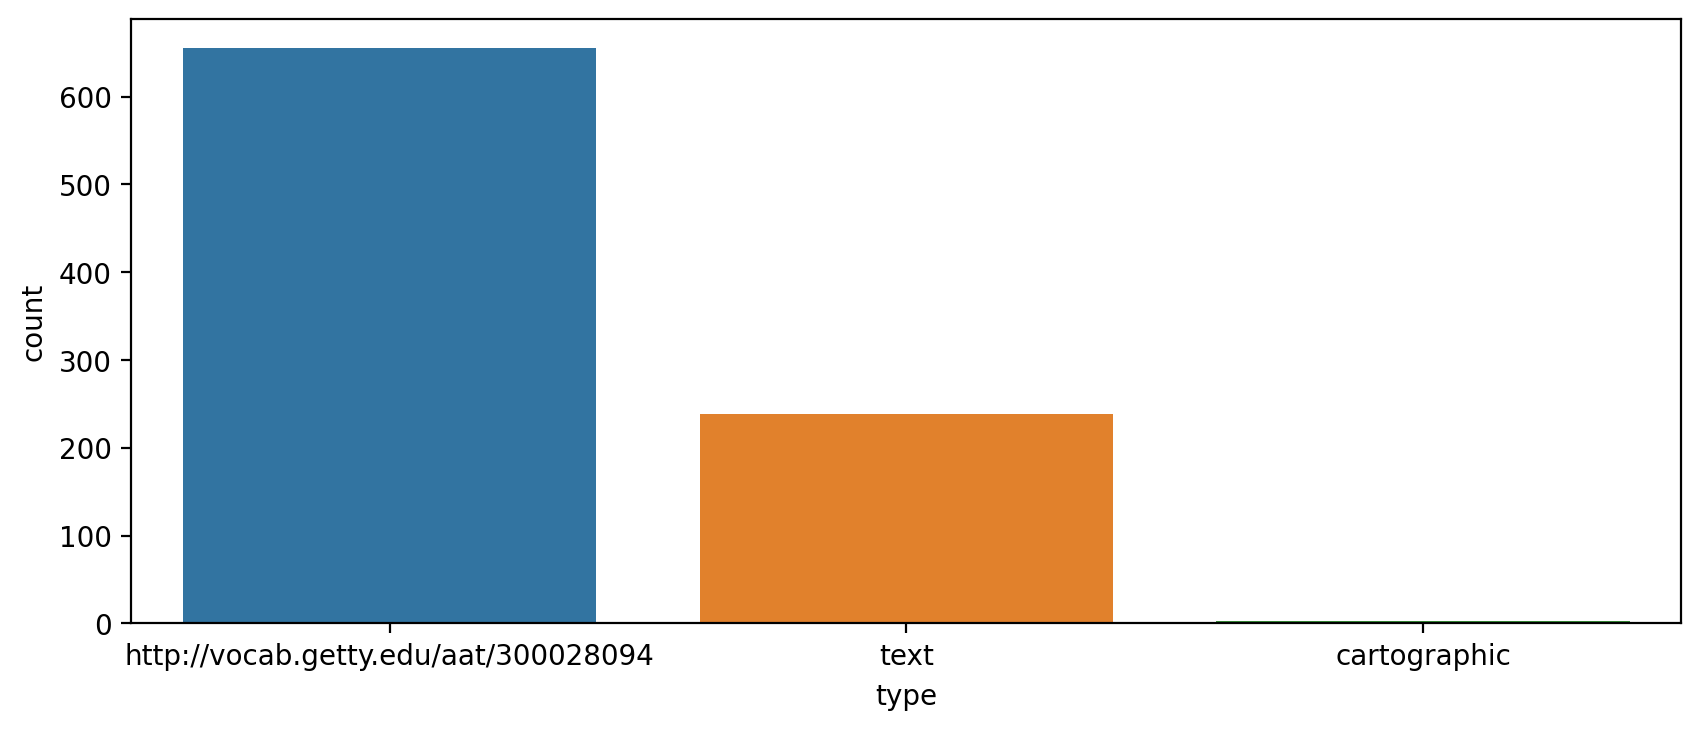

In [98]:
import seaborn as sns

plt.figure(figsize=(10,4),dpi=200)
sns.countplot(x='type',data=alma_beeldbank)

In [99]:
print('10 most occuring formats in beelbank data: \n', alma_beeldbank['format'].value_counts().iloc[:10].to_latex())

10 most occuring formats in beelbank data: 
 \begin{tabular}{lr}
\toprule
{} &  format \\
\midrule
vorm                         &     932 \\
handgemaakt: aquarel         &     838 \\
op de schijf gedraaid        &     399 \\
aardewerkmateriaal           &     300 \\
sculptuur, afgietsel in gips &     241 \\
offset                       &     209 \\
geschilderd                  &     205 \\
gedrukt: lithografie         &     167 \\
vlakdruk                     &     141 \\
sculptuur                    &     135 \\
\bottomrule
\end{tabular}



/tmp/ipykernel_8203/1964424418.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print('10 most occuring formats in beelbank data: \n', alma_beeldbank['format'].value_counts().iloc[:10].to_latex())


In [100]:
print('unique entries in language category:\n', alma_beeldbank['language'].unique())

unique entries in language category:
 ['fre' 'dut' 'yid' 'heb' 'lat' 'arm' 'arc' 'spa' 'ita' 'ger' 'por' 'eng'
 'goh' 'nds' 'und' 'grc' 'mul' 'ara' 'fry' 'mis' 'swe' 'afr' 'may' 'san'
 'chi' 'nor' 'rus' 'dan' 'map' 'jav' 'sun' 'dum' 'epo' 'gre' 'ben' 'hun'
 'paa' 'fin' 'pol' 'ban' 'per' 'Nederlands [TA].' 'hin' 'ind' 'egy' 'xxx'
 'Text in Latin and Dutch.' 'Hebreeuws in Latijns schrift.'
 'Duits met Hebreeuwse letters.' 'In het Duits met Hebreeuwse letters.'
 'Duits met Hebreeuwse.' 'Tekst in het Duits met Hebreeuwse letters.'
 'Taal onduidelijk, vermoedelijk Duits.'
 'Taal: misschien Hebreeuws in transcriptie.'
 'Taal onduidelijk, vermoedelijk Hebreeuws in transcriptie.']


In [101]:
print('value counts in language category per language:\n', alma_beeldbank['language'].value_counts().iloc[:10].to_latex())

value counts in language category per language:
 \begin{tabular}{lr}
\toprule
{} &  language \\
\midrule
dut &     13451 \\
heb &      9764 \\
xxx &      8702 \\
ger &       992 \\
fre &       664 \\
lat &       634 \\
eng &       576 \\
und &       183 \\
yid &       151 \\
spa &        70 \\
\bottomrule
\end{tabular}



/tmp/ipykernel_8203/1641250430.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print('value counts in language category per language:\n', alma_beeldbank['language'].value_counts().iloc[:10].to_latex())


In [102]:
print('unique authors of items in beeldbank:\n', alma_beeldbank['contributor'].unique())

unique authors of items in beeldbank:
 ['Quellinus, Artus (Artus), beeldhouwer, 1609-1668. (NL-LeOCL)091438969 https://open-na.hosted.exlibrisgroup.com/alma/31UKB_UAM1_INST/authorities/9839288655305131.jsonld'
 'Lennep, J. van (Jacob), 1802-1868, publisher (NL-LeOCL)06833544X https://open-na.hosted.exlibrisgroup.com/alma/31UKB_UAM1_INST/authorities/9839182012305131.jsonld'
 'Zevi Hirsh ben Abraham transcriber'
 'ʾAbohav, Yiẕḥaq, 1605-1693 author (NL-LeOCL)071466274'
 'Hooft, P.C. (Pieter Corneliszoon), 1581-1647 author (NL-LeOCL)068339135 https://open-na.hosted.exlibrisgroup.com/alma/31UKB_UAM1_INST/authorities/9839182090905131.jsonld'
 'Blaeu, Pieter, 1637-1706, correspondent (NL-LeOCL)071536787 https://open-na.hosted.exlibrisgroup.com/alma/31UKB_UAM1_INST/authorities/9839213191705131.jsonld'
 'Höjer, George ca. 1628-1670 collector'
 'Passe, Crispijn van de, de jongere, 1594/97-1670. (NL-LeOCL)069952426 https://open-na.hosted.exlibrisgroup.com/alma/31UKB_UAM1_INST/authorities/983919

In [103]:
print('n0 of occuring items per author:\n', alma_beeldbank['contributor'].value_counts())

n0 of occuring items per author:
 Pekidim & Amarkalim (Amsterdam) rcp                                                                                                                                 10044
H. G. Bom Amsterdam                                                                                                                                                   270
G. Th. Bom & Zn Amsterdam                                                                                                                                             156
J. L. Beijers Utrecht                                                                                                                                                 156
R. W. P. de Vries Amsterdam                                                                                                                                           126
                                                                                                                    

In [104]:
unique_dates = alma_beeldbank['date'].unique()

In [105]:
print('items per year: ', alma_beeldbank['date'].value_counts().to_markdown())

items per year:  |                                                      |   date |
|:-----------------------------------------------------|-------:|
| 1889                                                 |   1548 |
| 1887                                                 |   1518 |
| 1888                                                 |   1282 |
| 1918                                                 |   1066 |
| 1917                                                 |   1052 |
| 1916                                                 |   1050 |
| 1915                                                 |   1049 |
| 1919                                                 |   1032 |
| 1910                                                 |    916 |
| 1914                                                 |    885 |
| 1883                                                 |    860 |
| 1899                                                 |    830 |
| 1900                                                 |   

In [106]:
alma_beeldbank = alma_beeldbank.dropna(subset=['date'])

In [107]:
alma_beeldbank['date'] = alma_beeldbank['date'].astype(int)

ValueError: invalid literal for int() with base 10: '16uu'

In [108]:
alma_beeldbank = alma_beeldbank[alma_beeldbank['date'] <= 2022]

TypeError: '<=' not supported between instances of 'str' and 'int'

In [109]:
alma_beeldbank = alma_beeldbank.sort_values('date')

In [110]:
alma_beeldbank['date'].value_counts(sort=False)

0-100 na Christus                          20
0-100 na Christus of later                  1
0-200 na Christus                           7
0001                                       16
0020                                        5
                                           ..
vroeg hellenistisch                         1
vroeg-hellenistisch (vermoedelijk)          1
vroege Keizertijd                           1
vroege keizertijd 1ste eeuw na Christus     1
vóór-/vroeg dynastisch Archaïsch            1
Name: date, Length: 899, dtype: int64

AttributeError: module 'matplotlib.pyplot' has no attribute 'set_xticklabels'

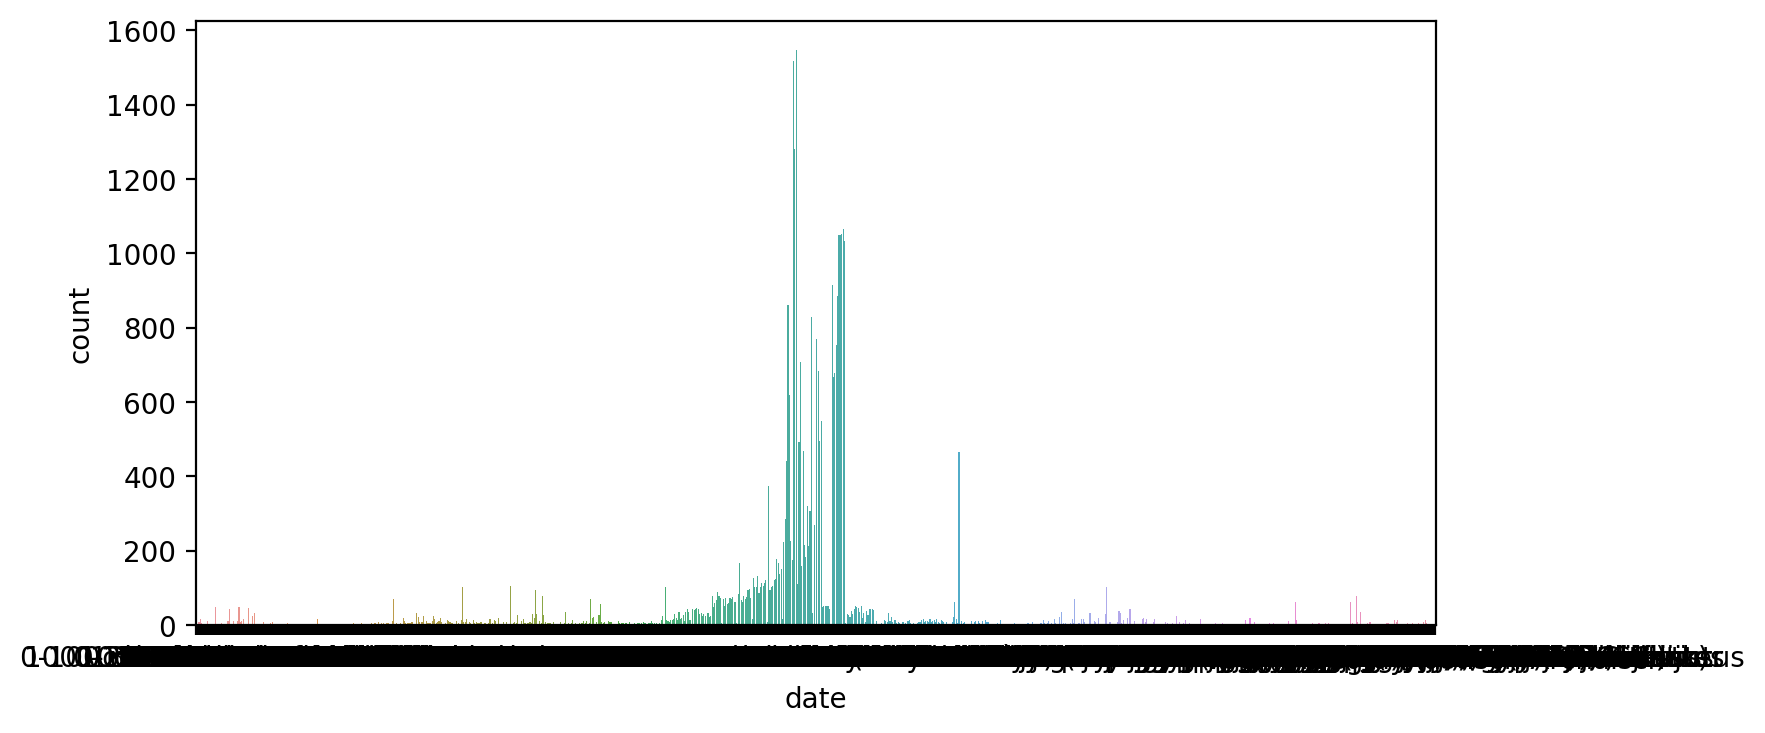

In [111]:
plt.figure(figsize=(8,4),dpi=200)
sns.countplot(x='date', data=alma_beeldbank, orient='v')
plt.xticks(size=10)
plt.set_xticklabels(chart.get_xticklabels(), rotation=45)


In [ ]:
sns.displot(data=alma_beeldbank, x='date', kde=True)

In [ ]:
joined = " ".join(alma_beeldbank['title'].dropna().unique())

In [ ]:
import wordcloud

In [ ]:
# code copied from: https://jingwen-z.github.io/data-viz-with-matplotlib-series9-word-cloud/
wordcloud = wordcloud.WordCloud(width=1280, height=853, margin=0,
                      colormap='Blues').generate(joined)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.margins(x=0, y=0)
plt.savefig('descriptions_wordcloud.png')
plt.show()

In [ ]:
# author to keywords (from titles)
french = set(stopwords.words('french'))
english = set(stopwords.words('english'))
german = set(stopwords.words('german'))
dutch = set(stopwords.words('dutch'))

punctuation = set(list(punctuation))

keywords = {}

for author in alma_beeldbank['contributor'].unique():

    body = " ".join(alma_beeldbank[alma_beeldbank['contributor'] == author]['title']).lower()
    values = word_tokenize(body)

    lang = alma_beeldbank[alma_beeldbank['contributor'] == author]['language']
    print(lang)

    if author in keywords: 
        print('entry already present!')
        keywords[author][0] += values 
    else:
        keywords[author] = (values, lang)

    keywords[author] = (set(keywords[author][0]), keywords[author][1])
    filtered = []

    for w in keywords[author][0]:

        if keywords[author][1] == 'fre':
            if w not in french:
                if w not in punctuation:
                    filtered.append(w)
        elif keywords[author][1] == 'eng':
            if w not in english:
                if w not in punctuation:
                    filtered.append(w)
        elif keywords[author][1] == 'ger':
            if w not in german:
                if w not in punctuation:
                    filtered.append(w)
        elif keywords[author][1] == 'dut':
            if w not in dutch:
                if w not in punctuation:
                    filtered.append(w)
        else:
            if w not in punctuation:
                filtered.append(w)

    # potentially add language 
    keywords[author] = filtered

## search for APM in any of the columns of alma beeldbank export

In [ ]:
substring = 'apm'
df[df.apply(lambda row: row.astype(str).str.contains(substring, case=False).any(), axis=1)]

## Beeldbank marc

In [ ]:
titles = [record.title() for record in alma_beeldbank_marc]

In [ ]:
# vergelijking van marc en dublin core record. 
# een aantal velden missen/maar waren hoogstwaarschijnlijk niet nuttig geacht. 

example_record = alma_beeldbank_marc[0]
print(example_record)

print('comparison with \n')

for name, values in alma_beeldbank.loc[0].iteritems():
    print(values)

## Data exploration of [archaeological objects](https://uba.uva.nl/en/support/open-data/data-sets-and-publication-channels/data-sets-and-publication-channels.html#Archeological-objects)
dublin core, [download](https://diensten.uba.uva.nl/open_data/downloads/uva_alma_archobjects_dc_new.tar.gz)

In [ ]:
# dc export
archobjects_dc = pd.read_xml('data/uva_alma_archobjects_dc_new.xml')
archobjects_dc

marc extension, [download](https://diensten.uba.uva.nl/open_data/downloads/uva_alma_archobjects_marc_new.tar.gz) first edited from xml to marc using [marc editing tool](https://marcedit.reeset.net/downloads). 

In [ ]:
from pymarc import MARCReader

with open('data/uva_alma_archobjects_marc_new.mrc', 'rb') as fh:
    reader = MARCReader(fh)
    for record in reader:
        print(record)

In [ ]:
from pymarc import parse_xml_to_array

records = parse_xml_to_array('data/uva_alma_archobjects_marc_new.xml')
records

## theater dataset

In [ ]:
tin = pd.read_xml('data/wwwopac_TIN_limit100000.xml')
tin

In [ ]:
tin_1 = pd.read_xml('data/theatercollecties_test1.xml')
tin_1

In [ ]:
archobjects = pd.read_xml('data/uva_alma_archobjects_dc_new.xml')
archobjects

In [ ]:
tin_1 = pd.read_xml('data/theatercollecties_test1.xml')

values = [tin_1[c].iloc[tin_1[c].first_valid_index()] for c in tin_1.columns]

# expects list of tuples: [('column name', 'column_value'), ..., ]
def to_lod(input_field):
    if input_field[0] == 'creator':
        return ('http://purl.org/dc/elements/1.1/creator', input_field[1])
    if input_field[0] == 'creator.role':
        return ('http://purl.org/dc/elements/1.1/creator', input_field[1])
    if input_field[0] == 'performance.title':
        return ('https://www.dublincore.org/specifications/dublin-core/dcmi-terms/elements11/title/', input_field[1])
    if input_field[0] == 'production.date':
        return ('http://purl.org/dc/elements/1.1/date', input_field[1])
    if input_field[0] == 'reproduction.reference':
        return ('http://purl.org/dc/elements/1.1/identifier', input_field[1])
    if input_field[0] == 'object_category':
        return ('https://www.dublincore.org/specifications/dublin-core/dcmi-terms/elements11/type/', input_field[1])
    else: 
        return input_field

result = map(to_lod, list(zip(tin_1.columns, values)))
lod_result = pd.DataFrame(result, columns= ['predicate', 'object'])
lod_result


In [112]:
import requests

URL = "https://servicetin.adlibhosting.com/te4/wwwopac.ashx?command=search&database=collectTEphotos3&search=pointer%20353&output=xml&limit=10&startfrom=1&xmltype=grouped"

response = requests.get(URL)
with open('feed.xml', 'wb') as file:
    file.write(response.content)

In [113]:
tin_1 = pd.read_xml('feed.xml')
tin_1

IndexError: list index out of range

## export images from alma beeldbank

In [114]:
import requests
from bs4 import BeautifulSoup

# Making a GET request
r = requests.get('https://www.theatercollectie.uva.nl/Details/collect/42164')

# Parsing the HTML
soup = BeautifulSoup(r.content, 'html.parser')
print(soup.prettify())

<!DOCTYPE html>
<html lang="nl" xml:lang="nl" xmlns="http://www.w3.org/1999/xhtml">
 <head>
  <meta content="text/html;charset=utf-8" http-equiv="Content-Type"/>
  <meta content="IE=9; IE=8; IE=7; IE=EDGE" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <meta content="black" name="apple-mobile-web-app-status-bar-style"/>
  <title>
   Theatercollectie UvA |
  Details
  </title>
  <meta content="Axiell Internet Server is een complete applicatie waarmee de collecties van archieven, musea en bibliotheken via internet toegangelijk worden gemaakt. Axiell Internet Server is een add-on voor de Axiell-applicaties voor professionals: Adlib Archief, Adlib Museum en Adlib Bibliotheek." name="description"/>
  <meta content="Axiell Internet Server, Archief, Museum, Bibliotheek, Opac, OPC, Collectiemanagement, Collectiebeheer, Online collecties, SDI, Tagging, Web 2.0, Croud sourcing, Thesaurus, ISAD(G), SPECTRUM, EAD, ISBD, ICOM, CIDOC" name="k

In [115]:
s = soup.find('div', class_='record')

labels = s.find('div', class_='label')
values = s.find('div', class_='value')
s

<div class="record">
<div class="record-selector" data-database="collect" data-priref="42164" data-selected="false" xmlns:str="http://xsltsl.org/string">
<div class="selector-script button remove-selection-button" style="
            display:none;
          ">
<div class="button-content">Verwijder uit selectie<span class="fa fa-star"></span></div>
</div>
<div class="selector-script button add-selection-button" style="">
<div class="button-text">Voeg toe aan selectie<span class="far fa-star"></span></div>
</div>
</div>
<div class="ais-detail-logo">
<ul class="content zebra">
<li>
<div class="label" valign="top"> </div>
<div class="value">
<div class="logo"><input class="ais-image-filename-value" type="hidden" value="kt417.000.jpg"/><input class="ais-image-server" type="hidden" value="images"/><a class="ais-detail-image-viewer-link ais-detail-image-viewer-link-script" href="https://theatercollectie.uva.nl/webapi/wwwopac.ashx?command=getcontent&amp;server=images&amp;value=kt417.000.jpg&am

In [116]:
from PIL import Image
import requests
import bs4

In [117]:
alma_beeldbank['identifier']

# for handl in alma_beeldbank['identifier']:
#     print(handl)

# url = 'some.site.com'

# response = requests.get(url)

# soup = bs4.BeautifulSoup(response.text, 'html.parser')

# image = soup.find('img')
# image_url = image['src']


# img = Image.open(requests.get(image_url, stream = True).raw)

# img.save('image.jpg')

12332    https://hdl.handle.net/11245/3.28174
10587     https://hdl.handle.net/11245/3.2624
12381    https://hdl.handle.net/11245/3.28272
10640      https://hdl.handle.net/11245/3.910
10860    https://hdl.handle.net/11245/3.27680
                         ...                 
9422       https://hdl.handle.net/11245/3.231
9708      https://hdl.handle.net/11245/3.3147
11830    https://hdl.handle.net/11245/3.27682
11599      https://hdl.handle.net/11245/3.714
10246    https://hdl.handle.net/11245/3.28488
Name: identifier, Length: 35093, dtype: object

# linking from online --> offline

In [118]:
literature = []

def literature(link):
    page = requests.get(link)
    soup = BeautifulSoup(page.content, "html.parser")

    lit = []

    litsec = soup.find_all(class_="row label-publications")

    for l in litsec:
        lit += [l.find_all(class_='object-detail-data')[0].text]
    return lit

l = alma_beeldbank['identifier'].iloc[:50].apply(literature)

In [119]:
alma_beeldbank['literature'] = l

In [120]:
alma_beeldbank['literature']
alma_beeldbank['literature'].iloc[8]

[]

In [121]:
query = ['Bibliotheca']
df_x = alma_beeldbank.explode('literature')
df_x.set_index('literature').loc[query].reset_index(drop=True)

KeyError: "None of [Index(['Bibliotheca'], dtype='object', name='literature')] are in the [index]"

In [ ]:
alma_beeldbank['literature'] = literature

# ground truth APM labels

In [ ]:
import math

In [ ]:
df = pd.read_excel('../data/catalogs/Crossroads - spreadsheet.xlsx', header=9)

In [ ]:
import re

def apm(descr):
    return re.findall('(?:APM)\s*\d+', descr)

df['APM'] = df['Image name'].dropna().apply(apm)

In [ ]:
df['APM']

In [ ]:
references = df['APM'].values.tolist()

In [ ]:
references = [r for r in references if r != [] and type(r) != float]

In [ ]:
references
online_indices = [(0,0),(3,0),(5,0),(6,0),(9,1)]

In [ ]:
references

actually we have to cross reference this against the APM numbers in the pdf of the catalog

In [ ]:
# from catalog

In [ ]:
illustratieverantwoording = ' 10 above (APM16324),  \n1 3 (APM13822, APM9370),  \n29 above (APM7855),  5 1 (APM9276, APM9278, APM9280),  52 (APM16772),  \n66 (APM7468),  \n6 7 (APM12995),  \n69, 71 (APM7798),  \n72 (APM16388),  73 (APM3830),  \n7 4 (APM7798),  \n103 below (APM12974), \n1 46 (APM8471),  1 47 (APM8107),  \n1 6 2 (APM7071),  1 63 left (APM09163),  \n1 63 right (APM15589),  \n1 7 6 above (APM16369), 1 80 (APM3831, APM10998)'

In [ ]:
references_book = apm(str(illustratieverantwoording))

In [ ]:
def cross_reference(references, references_book):
    
    cr = []
    
    for r in references_book:
        if [r] in references:
            cr += [r]
    return cr

In [ ]:
references, references_book

In [ ]:
# all of the 

In [ ]:
cross_reference(references, references_book)

In [ ]:
"Inventory numbers Allard
Pierson Museum
Cover: 14232
p. 6: 16751
p. 28: 3493
p. 31: 3271
p. 33: 7802
p. 35: above 7164, below 7316
p. 37: 7971
p. 38: 9227
p. 40: 16883
p. 41: 16228
p. 43: 13055
p. 45: 1379
p. 48: 13937
p. 50: above 12378, below
10167
p. 52: 13825
p. 53: 1627
p. 55: 7347 and 7349
p. 56: 7286
p. 57: 7359 and 13963
p. 59: 7326
p. 61: 2907
p. 62: 1786 (photo Restauratieatelier
Restaura)
p. 64: above 3239 and 2845,
below 1785
p. 65: 788
p. 69: 1892
p. 72: 8343
p. 73: above 13946,
below 15758
p. 74: above 15369 and 15370
p. 75: 14005
p. 76: 6349
p. 77: 12428
p. 78: 7592
p. 80: 15396
p. 81: 8188
p. 82: 3242 and 3243
p. 84: above 9374, below 1774
p. 85: 8180
p. 86: 3269
p. 87: 3422
p. 92: 12
p. 93 above 1606
p. 95: 8552
p. 96: 35
p. 97: above 12417, below
12534
p. 100: above 7066, 8124, 8116,
below 8117, 7065, 8120
p. 101: 7974
p. 102: 7757
p. 103: 8133
p. 104: left 7288, 7290, 7874
and 8023, right 725
p. 105: 7768
p. 107: 8146.001-009
p. 108: 8169
p. 109: 16217
p. 110: 16166
p. 115: 9234
p. 118: 1674
p. 119: 15076
p. 122: 1402
p. 123: 8016
p. 124: 7799
p. 126: 8175
p. 128: 7946
p. 131: 11972
p. 132: 1765
p. 133: 15914
p. 137: 5205, 5208, 5216, 5220,
5222, 5230
p. 139: 15927
p. 140: 9894-9900, 10675
p. 141: 9350
p. 142: 8133
p. 143: 7022
p. 144: 6295, 6296, 7304,
7308, 14165
p. 145: 7001, 7003, 7004
p. 146: 724
p. 148: 1687
p. 151: above 15746, below
1722
p. 153: 8363, 319, 1681, 6319,
p. 156: 12.324
p. 157: left 16618, right 12481
p. 158: above 15689,
below 15999
p. 161: 451
p. 162: 3579
p. 163: 7163
p. 164: 7310
p. 165: 9224
p. 167: 7379
p. 174: 14.409
p. 176: 5180
p. 177: 16763
p. 178-179: 10854
p. 180: 10.854
p. 181: 9241
p. 182: 6287
p. 183: 16882
p. 185: 16604, 16607, 16612,
16614, 16616, 16610

In [ ]:
Inventarisnummers
Allard Pierson Museum
omslag: 4076
blz. 17: boven 196-1/2; onder
4170-4173, 4222
blz. 18: 4206, 4143, 4145
blz. 21: 15290
blz. 22: boven 4162, 4218, 4164, 4219;
onder 3974/3863, 3972A
blz. 23: 12637
blz. 33: 12720, 15276, 3943
blz. 34: boven 3858; onder 12676,
12678
blz. 35: boven 4044; onder 15999,
16476
blz. 37: 15302, 15301
blz. 39: boven 7298; onder 4306
blz. 40: 3635, 12683
blz. 42: boven 8752/14021; onder
Schriftmuseum Dortmond
P. Amsterdam 22
blz. 43: 9274, 15592
blz. 46: 3933
blz. 47: 8850
blz. 48: 3400
blz. 49: 16000
blz. 51: 8539
blz. 53: 12698
blz. 54: 12647, 14238
blz. 63: 15350
blz. 64: 9237
blz. 65: 8789
blz. 69: 12978
blz. 73: APM 9115
blz. 75: 1387
blz. 76: boven 3408, 360, 3799;
onder 11960
blz. 77: 12718, 8537
blz. 78: 8851; Schriftmuseum
Dortmond, no. 115
blz. 79: boven 9114; onder 8875, 1676
blz. 86: 16500
blz. 87: boven 9223; onder 8811
blz. 88: 13283a-j, 8800
blz. 99: 391
blz. 100: boven 8065; onder 13292
blz. 102: 7774
blz. 103: 12760, 4307, 15326
blz. 104: 12977
blz. 105: 9475, 9492, 9502
blz. 106: 8562, 8563, 8417
blz. 107: 8831
blz. 108: 20
blz. 109: 8837
blz. 111: 13219
blz. 115: 8795/6
blz. 116: 7126
blz. 117: 7772
blz. 118: 6289
blz. 119: 7993
blz. 120: 8846
blz. 124: 7216, 7238, 7272
blz. 125: 13158
blz. 129: 7758
blz. 130: 7763
blz. 131: 9369
blz. 132: 8517
blz. 133: 7796
blz. 135: 14232
blz. 136: 7860, 7861
blz. 137: 9353
blz. 138: 7874, 9227
blz. 139: 7803
blz. 141: 7766
blz. 142: boven 7757; onder 7974
blz. 143: 7761
blz. 144: 8188
blz. 145: 6286
blz. 150: 12995, 14513
blz. 152: boven 16750; onder 14510
blz. 153: 8189
blz. 159: 16385